This notebook demonstrates how to visualize the output of the model trained in 4. Train Screen Classifier on a test screenshot. 

In [1]:
import os
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
import json

from screenclassification.ui_datasets import *
from screenclassification.ui_models import *

In [21]:
MODEL_CHECKPOINT = "screenclassification-resnet-noisystudent+web350k.ckpt"
CHECKPOINTS_DIR = "./downloads/checkpoints/"

### Helper functions

In [22]:
def loadClassMap():
    class_map_file = "metadata/screenclassification/class_map_enrico.json"
    with open(class_map_file, "r") as f:
        class_map = json.load(f)
        
    idx2Label = class_map['idx2Label']
    return idx2Label

In [23]:
def loadModel(): 
    model_path = os.path.join(CHECKPOINTS_DIR,  MODEL_CHECKPOINT)
    m = UIScreenClassifier.load_from_checkpoint(model_path).eval()
    return m

In [32]:
def getPredictionsForImage(model, image): 
    img_input = image
    if not torch.is_tensor(image):
        img_transforms = transforms.Compose([
            transforms.Resize(128), # resizes so that the smallest edge is 128
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
        img_input = img_transforms(image)
    
    pred = model(img_input.unsqueeze(0))
    return pred

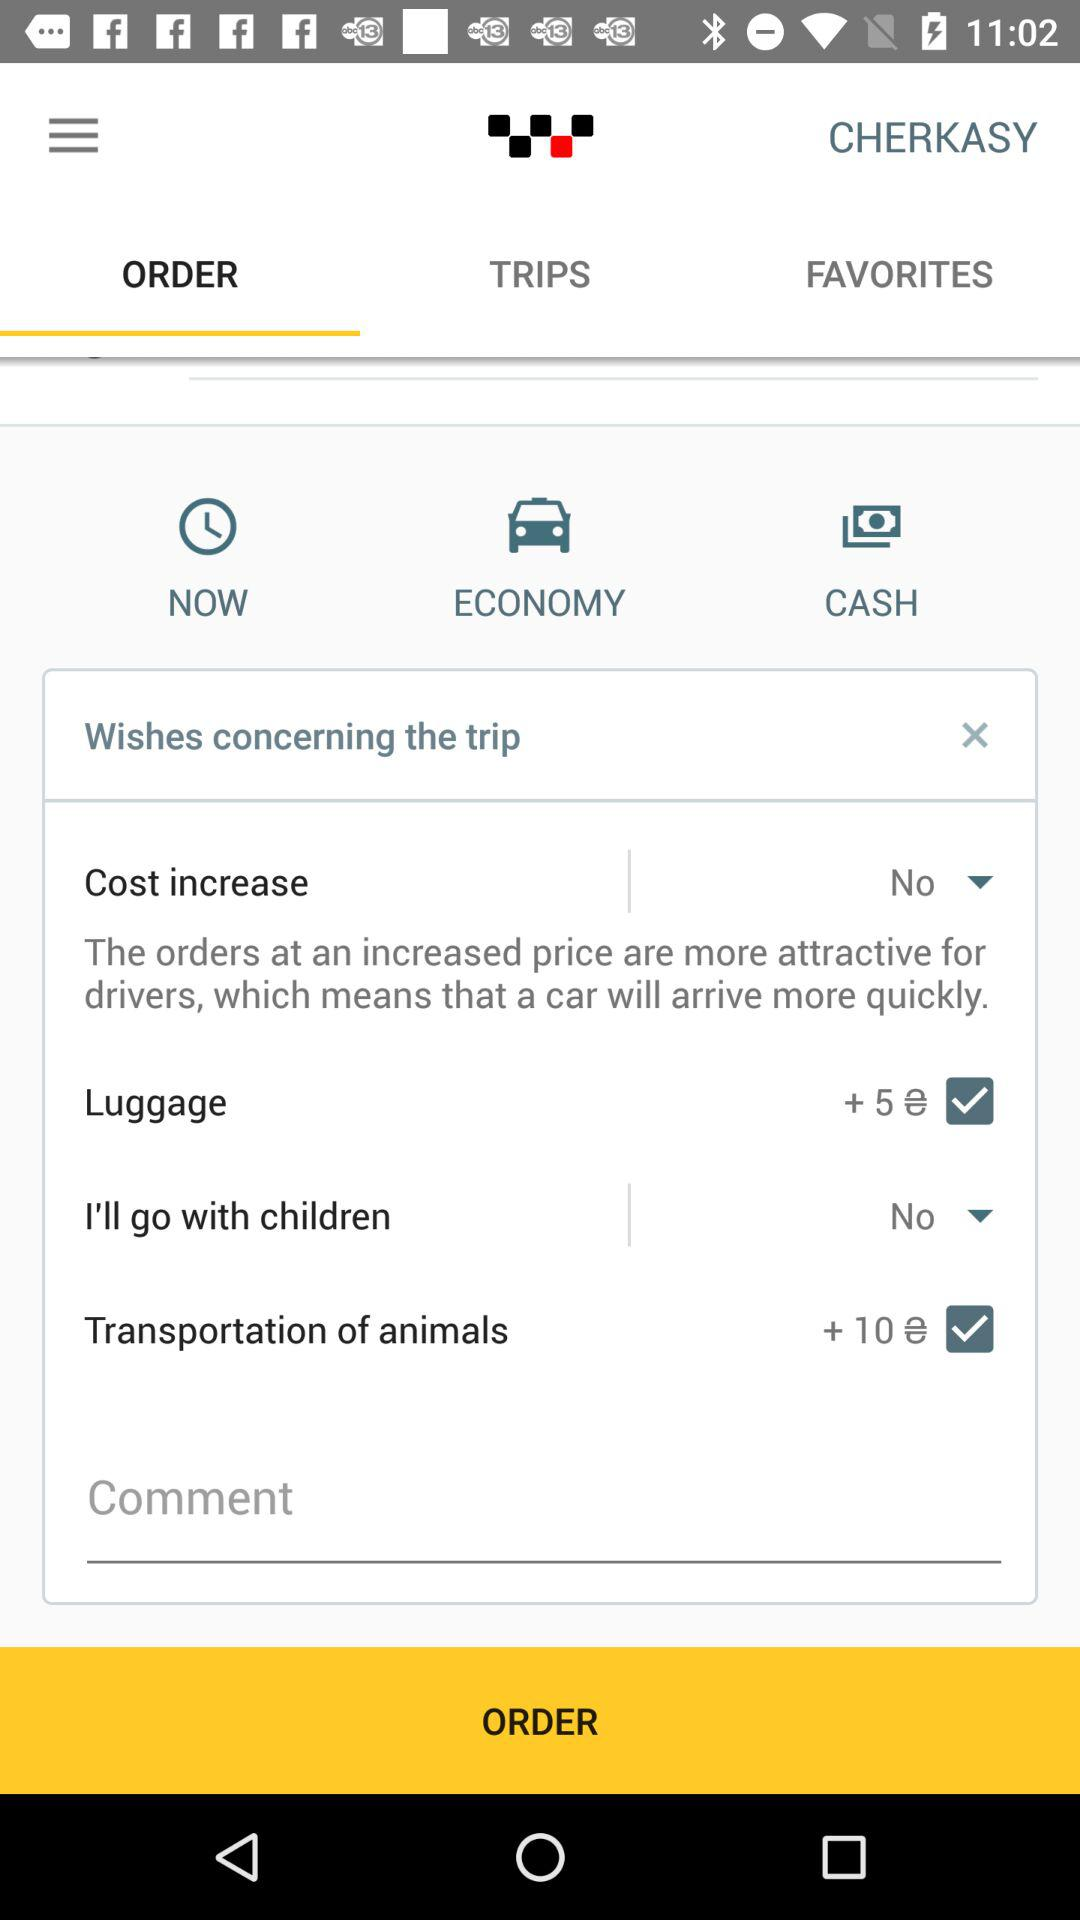

In [41]:
test_image = Image.open("2517.jpg")
test_image

In [34]:
idx2Label = loadClassMap()

In [35]:
idx2Label

{'0': 'bare',
 '1': 'calculator',
 '2': 'camera',
 '3': 'chat',
 '4': 'editor',
 '5': 'form',
 '6': 'gallery',
 '7': 'list',
 '8': 'login',
 '9': 'maps',
 '10': 'mediaplayer',
 '11': 'menu',
 '12': 'modal',
 '13': 'news',
 '14': 'other',
 '15': 'profile',
 '16': 'search',
 '17': 'settings',
 '18': 'terms',
 '19': 'tutorial'}

#### Classify the screen type from the test image

In [36]:
model = loadModel()

Lightning automatically upgraded your loaded checkpoint from v1.6.3 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file downloads/checkpoints/screenclassification-resnet-noisystudent+web350k.ckpt`


In [37]:
pred = getPredictionsForImage(model, test_image)

In [38]:
conf = F.softmax(pred, dim=-1)

In [39]:
_, ind = pred.max(dim=-1)

In [40]:
print("prediction:", idx2Label[str(int(ind))])
print("conf:", conf[0][ind])

prediction: profile
conf: tensor([0.6299], grad_fn=<IndexBackward0>)
